<a href="https://colab.research.google.com/github/gabi-bernardoni/Projeto-de-Mineracao-de-Textos/blob/main/BoW%2BKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##BoW + KNN

Bag of Words (BoW) é uma técnica de representação de texto que transforma documentos em vetores de características. No BoW, o texto é tratado como uma coleção de palavras. Cada documento é representado por um vetor que conta a frequência de cada palavra presente no documento.

O kNN é um algoritmo de aprendizado supervisionado no qual o “k” representa o número de vizinhos mais próximos considerados no problema de classificação ou regressão, e “NN” representa os vizinhos mais próximos do número escolhido para k.



##Funcionamento do Modelo

Começamos coletando os dados, separando textos e classificações, e dividindo em treino e teste. Transformamos os textos em vetores usando Bag of Words.

O KNN funciona de maneira diferente do Naive Bayes. Em vez de usar probabilidade, ele encontra os K vizinhos mais próximos para um texto novo, com base na distância entre os vetores de texto. A classe mais comum entre esses vizinhos é atribuída ao texto novo.

Treinamos o modelo KNN armazenando os dados de treino e, para fazer previsões, calculamos as distâncias entre o texto novo e todos os textos de treino, selecionamos os K mais próximos e determinamos a classificação com base na maioria.

### **Carregamento dos dados**

Primeiramento carregamos os dados  dos comentários

In [ ]:
import pandas as pd

dados_avaliacoes = pd.read_csv('avaliacoes.csv')
dados_avaliacoes.head(5)

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,positive,sadness,NaN
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,"O app é bem otimizado, fácil de visualizar os ...",positive,sadness,NaN
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,"O app é muito bom, prático e fácil de entender...",positive,sadness,NaN
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,Aplicativo muito bom. Mas algo que me chateou ...,positive,sadness,NaN
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,"o app é muito bom, porém tenho tido dificuldad...",negative,disgust,NaN


In [ ]:
dados_avaliacoes.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,3,7,1
top,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,negative,disgust,X
freq,1,303,1,1742,952,1


### **Pré Processamento**

Etapa em que limparemos os dados

In [ ]:
import regex # trabalhar com expressões regulares
dados_avaliacoes['content'] = dados_avaliacoes['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))

In [ ]:
dados_avaliacoes['content'] = dados_avaliacoes['content'].apply(lambda x: str(x).lower())

In [ ]:
import nltk #caso não funcione, adicione a linha nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
dados_avaliacoes['content'] = dados_avaliacoes['content'].apply(remove_stopwords) #remove stopwords

In [ ]:
dados_avaliacoes.loc[0, 'content']

'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

##Extração da features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()    #tranformar em vetor

In [ ]:
BoW_matriz = vectorizer.fit_transform(dados_avaliacoes['content']) #cria matriz de vetores

In [ ]:
BOW_dataframe=pd.DataFrame(BoW_matriz.toarray(),columns=vectorizer.get_feature_names_out())
BOW_dataframe

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Treinamento e teste


In [ ]:
textos_bow = BOW_dataframe
sentimentos = dados_avaliacoes['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, sentimentos, test_size=0.2) #20% para teste.

# X_train contém os 80% dos dados - treinamento
# y_train contém os 80% das categorias (atributo alvo) - treinamento

# X_test contém os 20% dos dados - teste
# y_test contém os 20% das categorias - teste

Aplicando o modelo KNN para predição

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
predicoes = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes))

# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

              precision    recall  f1-score   support

       anger       0.32      0.68      0.43       151
     disgust       0.52      0.16      0.24       190
        fear       0.00      0.00      0.00        10
   happiness       0.16      0.48      0.25        62
     neutral       0.16      0.28      0.20        18
     sadness       0.46      0.04      0.07       171
    surprise       0.00      0.00      0.00         1

    accuracy                           0.29       603
   macro avg       0.23      0.23      0.17       603
weighted avg       0.40      0.29      0.23       603



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Demonstrou desempenho baixo, quando comparado com o TF-IDF, isso se dá porque ajusta os pesos das palavras para sua importância e relevância o BoW trata as palavras igualmente.

Quando comparado com o Naive Bayes também mostra desempenho inferior.

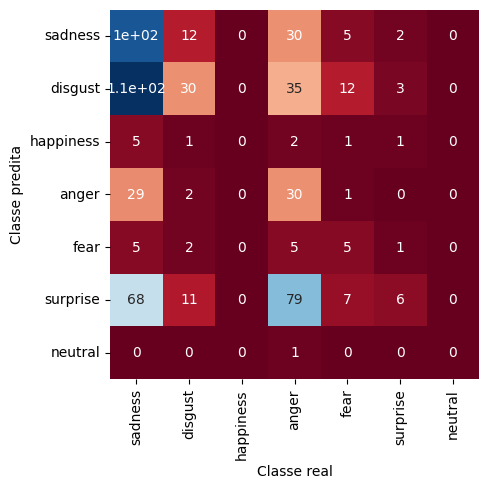

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=sentimentos.unique(),
            yticklabels=sentimentos.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

##Polaridade Sentimento

In [ ]:
textos_bow = BOW_dataframe
polaridade = dados_avaliacoes['sentiment_polarity'] # as categorias devem estar separadas dos dados de treinamento

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(textos_bow, polaridade, test_size=0.2) #20% para teste.

# X_train contém os 80% dos dados - treinamento
# y_train contém os 80% das categorias (atributo alvo) - treinamento

# X_test contém os 20% dos dados - teste
# y_test contém os 20% das categorias - teste

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5) #valor intermediário
knn_model.fit(X_train, y_train)
predicoes = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicoes))

# y_test contém as categorias conhecidas do conjunto de teste usado no método predict().
# predicoes contém as categorias preditas (retornadas) pelo método predict() com base nos dados de X_test.

              precision    recall  f1-score   support

    negative       0.76      0.67      0.71       347
     neutral       0.08      0.50      0.14        12
    positive       0.65      0.59      0.62       244

    accuracy                           0.63       603
   macro avg       0.50      0.59      0.49       603
weighted avg       0.70      0.63      0.66       603



Seu desempenho se mostra melhor quando se tem poucas classes a serem analisadas.

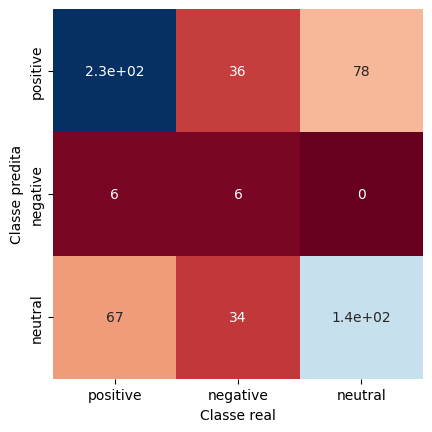

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicoes)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=polaridade.unique(),
            yticklabels=polaridade.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

Vantagens:

Simplicidade: BoW e KNN são relativamente simples de implementar;

Flexibilidade: KNN é um algoritmo flexível e pode funcionar bem com diferentes tipos de dados;


Limitações:

Eficiência Computacional: KNN pode ser computacionalmente caro, especialmente com grandes conjuntos de dados;

Escalabilidade: O desempenho de KNN pode degradar com o aumento do tamanho do conjunto de dados -

** O que pode ter geraldo um desempenho baixo em relação a outros modelos;



